# Assignment 5: Exploratory Data Analysis and Hypothesis Testing

**Student:** Brian Choi  
**Dataset:** Air Quality   
**Date:** 10/8/2025

## Objective
Perform exploratory data analysis (EDA) and hypothesis testing on Air Quality dataset. Identify patterns and test meaningful hypotheses about relationships between variables.

---


## 1. Import Data and Libraries

Import the necessary libraries and load your dataset.


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")


Libraries imported successfully!


In [67]:
df_raw = pd.read_csv(
    "AirQualityUCI.csv",
    sep=";",              
    decimal=",",          
)

# Drop empty trailing column if present
empty_like = [c for c in df_raw.columns if c.strip() == "" or c.startswith("Unnamed")]
if empty_like:
    df_raw = df_raw.drop(columns=empty_like)

# Standardize names
df_raw.columns = [c.strip().replace(" ", "_").replace(".", "_") for c in df_raw.columns]

# Combine Date and Time to timestamp index
def _mk_ts(row):
    t = str(row["Time"]).strip().replace(".", ":")
    return f'{row["Date"]} {t}'
ts = pd.to_datetime(df_raw.apply(_mk_ts, axis=1), format="%d/%m/%Y %H:%M:%S", errors="coerce")
df = df_raw.copy()
df.insert(0, "timestamp", ts)
df = df.sort_values("timestamp").set_index("timestamp")

# Convert numeric and map -200 to NaN
num_cols = [c for c in df.columns if c not in ["Date", "Time"]]
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")
    df.loc[df[c] == -200, c] = np.nan

# drop rows with no timestamp
df = df[~df.index.isna()]

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (9357, 15)


,Date,Time,CO(GT),PT08_S1(CO),NMHC(GT),C6H6(GT),PT08_S2(NMHC),NOx(GT),PT08_S3(NOx),NO2(GT),PT08_S4(NO2),PT08_S5(O3),T,RH,AH
timestamp,,,,,,,,,,,,,,,
2004-03-10 18:00:00,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-03-10 19:00:00,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-03-10 20:00:00,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-03-10 21:00:00,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-03-10 22:00:00,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


## 2. Exploratory Data Analysis (EDA)

Explore your dataset to understand its structure and identify patterns.


In [ ]:
# Basic dataset information
print("=== DATASET OVERVIEW ===")
print(f"SHAPE: {df.shape}")
print(f"\nDATA TYPES:")
print(df.dtypes)
print(f"\nMISSING VALUES:")
display(df.isna().sum().sort_values(ascending=False).head(10))
print(f"\nBASIC STATISTICS:")
display(df.describe().T)


=== DATASET OVERVIEW ===
SHAPE: (9357, 15)

DATA TYPES:
Date              object
Time              object
CO(GT)           float64
PT08_S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08_S2(NMHC)    float64
NOx(GT)          float64
PT08_S3(NOx)     float64
NO2(GT)          float64
PT08_S4(NO2)     float64
PT08_S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object

MISSING VALUES:


NMHC(GT)         8443
CO(GT)           1683
NO2(GT)          1642
NOx(GT)          1639
PT08_S2(NMHC)     366
C6H6(GT)          366
PT08_S1(CO)       366
PT08_S5(O3)       366
T                 366
PT08_S3(NOx)      366
dtype: int64


BASIC STATISTICS:


,count,mean,std,min,25%,50%,75%,max
CO(GT),7674.0,2.152750,1.453252,0.1000,1.1000,1.8000,2.9000,11.900
PT08_S1(CO),8991.0,1099.833166,217.080037,647.0000,937.0000,1063.0000,1231.0000,2040.000
NMHC(GT),914.0,218.811816,204.459921,7.0000,67.0000,150.0000,297.0000,1189.000
C6H6(GT),8991.0,10.083105,7.449820,0.1000,4.4000,8.2000,14.0000,63.700
PT08_S2(NMHC),8991.0,939.153376,266.831429,383.0000,734.5000,909.0000,1116.0000,2214.000
NOx(GT),7718.0,246.896735,212.979168,2.0000,98.0000,180.0000,326.0000,1479.000
PT08_S3(NOx),8991.0,835.493605,256.817320,322.0000,658.0000,806.0000,969.5000,2683.000
NO2(GT),7715.0,113.091251,48.370108,2.0000,78.0000,109.0000,142.0000,340.000
PT08_S4(NO2),8991.0,1456.264598,346.206794,551.0000,1227.0000,1463.0000,1674.0000,2775.000
PT08_S5(O3),8991.0,1022.906128,398.484288,221.0000,731.5000,963.0000,1273.5000,2523.000


Target variable: CO(GT)


count    7674.000000
mean        2.152750
std         1.453252
min         0.100000
25%         1.100000
50%         1.800000
75%         2.900000
max        11.900000
Name: CO(GT), dtype: float64


Distribution preview:


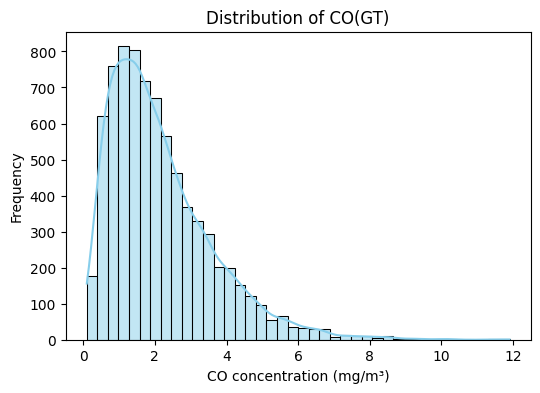

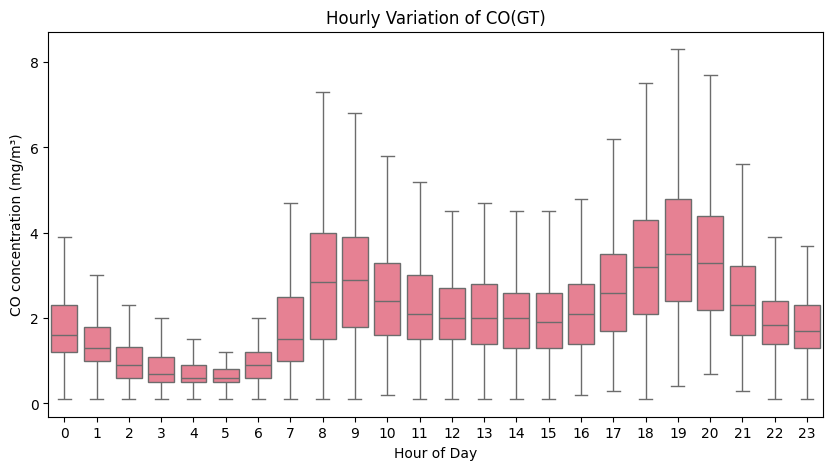

In [ ]:
# Target variable analysis
target = "CO(GT)"
print(f"Target variable: {target}")
display(df[target].describe())

print("\nDistribution preview:")
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.histplot(df[target].dropna(), bins=40, kde=True, color="skyblue")
plt.title("Distribution of CO(GT)")
plt.xlabel("CO concentration (mg/m³)")
plt.ylabel("Frequency")
plt.show()

# Visualize target distribution (by time of day)
df["hour"] = df.index.hour
df["weekday"] = df.index.weekday

plt.figure(figsize=(10,5))
sns.boxplot(x="hour", y=target, data=df, showfliers=False)
plt.title("Hourly Variation of CO(GT)")
plt.xlabel("Hour of Day")
plt.ylabel("CO concentration (mg/m³)")
plt.show()

,count,mean,std,min,25%,50%,75%,max
CO(GT),7674.0,2.152750,1.453252,0.1000,1.1000,1.8000,2.9000,11.900
PT08_S1(CO),8991.0,1099.833166,217.080037,647.0000,937.0000,1063.0000,1231.0000,2040.000
NMHC(GT),914.0,218.811816,204.459921,7.0000,67.0000,150.0000,297.0000,1189.000
C6H6(GT),8991.0,10.083105,7.449820,0.1000,4.4000,8.2000,14.0000,63.700
PT08_S2(NMHC),8991.0,939.153376,266.831429,383.0000,734.5000,909.0000,1116.0000,2214.000
NOx(GT),7718.0,246.896735,212.979168,2.0000,98.0000,180.0000,326.0000,1479.000
PT08_S3(NOx),8991.0,835.493605,256.817320,322.0000,658.0000,806.0000,969.5000,2683.000
NO2(GT),7715.0,113.091251,48.370108,2.0000,78.0000,109.0000,142.0000,340.000
PT08_S4(NO2),8991.0,1456.264598,346.206794,551.0000,1227.0000,1463.0000,1674.0000,2775.000
PT08_S5(O3),8991.0,1022.906128,398.484288,221.0000,731.5000,963.0000,1273.5000,2523.000


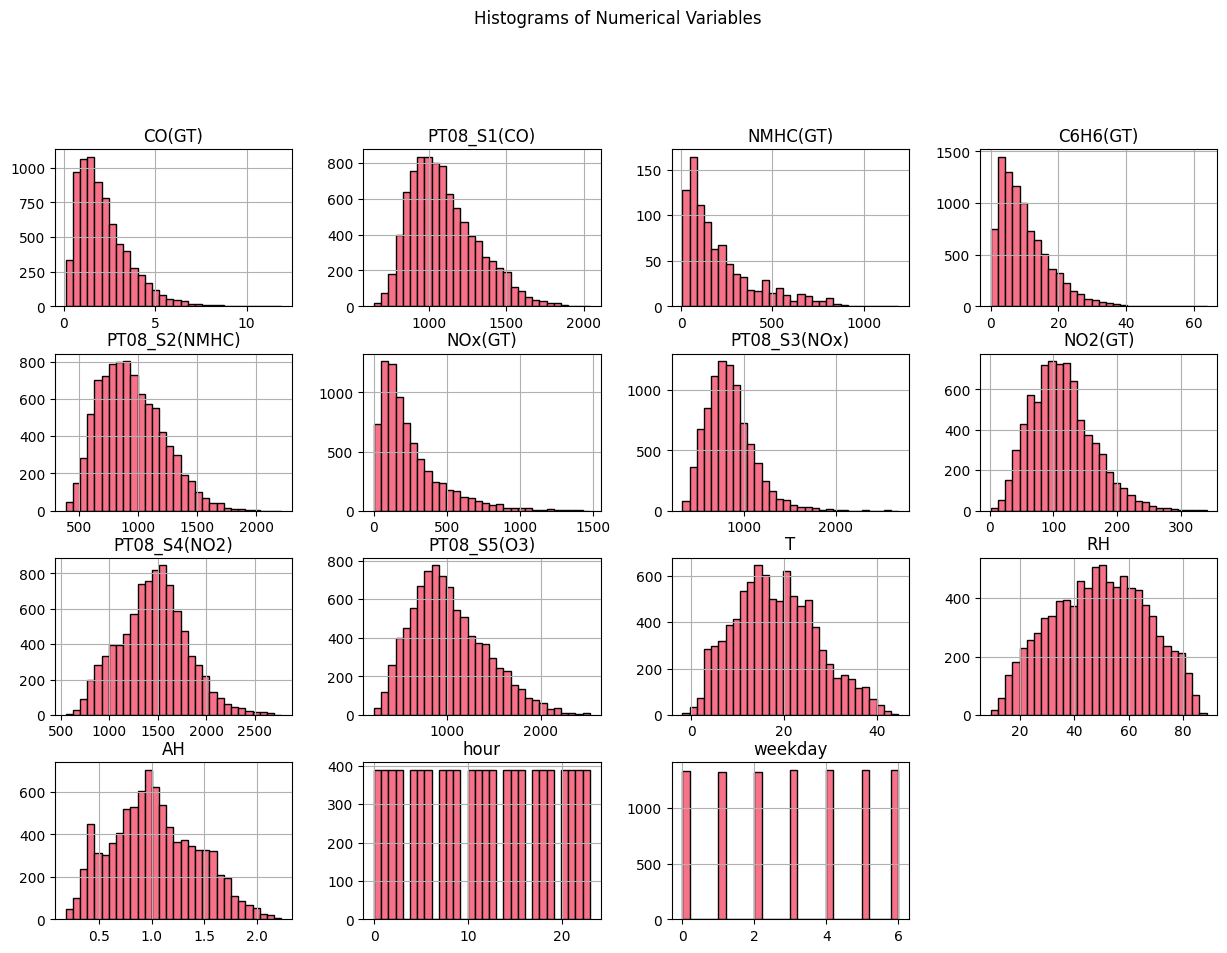

In [ ]:
# Numerical variables analysis
num_cols = df.select_dtypes(include=["float", "int"]).columns
num_cols = [c for c in num_cols if not c.startswith("Unnamed")]
display(df[num_cols].describe().T)

# Create histograms for numerical variables
df[num_cols].hist(figsize=(15,10), bins=30, edgecolor="black")
plt.suptitle("Histograms of Numerical Variables", y=1.02)
plt.show()

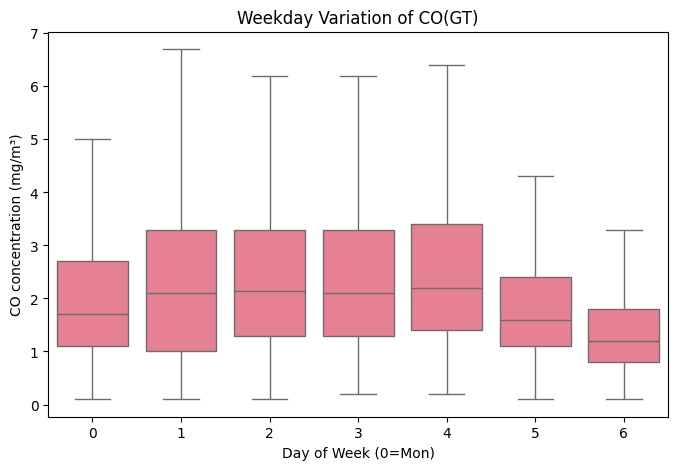

In [49]:
# Time-based categorical analysis
# Examine how CO(GT) varies by hour of day and day of week
plt.figure(figsize=(8,5))
sns.boxplot(x="weekday", y=target, data=df, showfliers=False)
plt.title("Weekday Variation of CO(GT)")
plt.xlabel("Day of Week (0=Mon)")
plt.ylabel("CO concentration (mg/m³)")
plt.show()

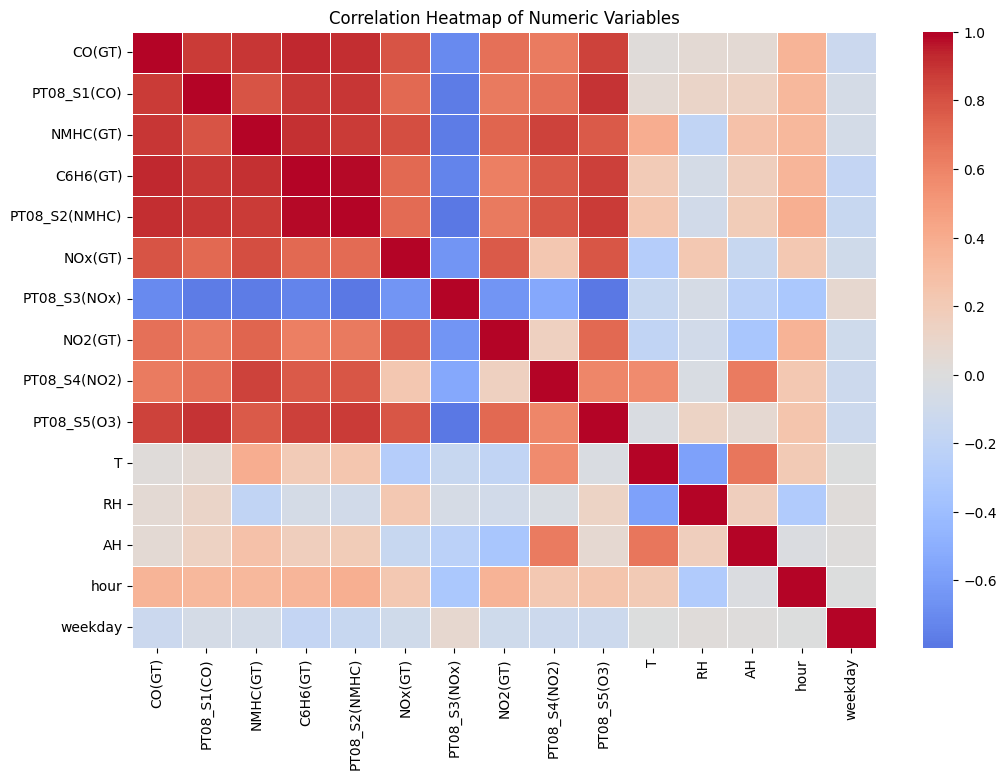

In [52]:
# Correlation analysis
corr = df[num_cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()


=== RELATIONSHIPS WITH TARGET ===


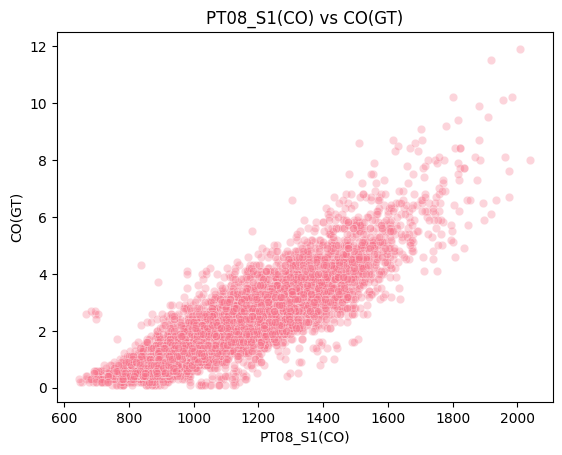

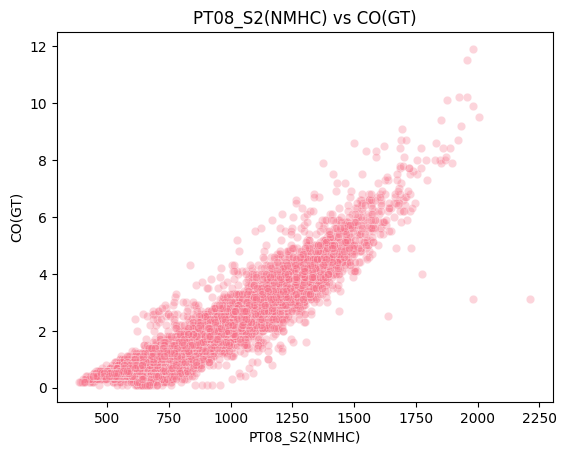

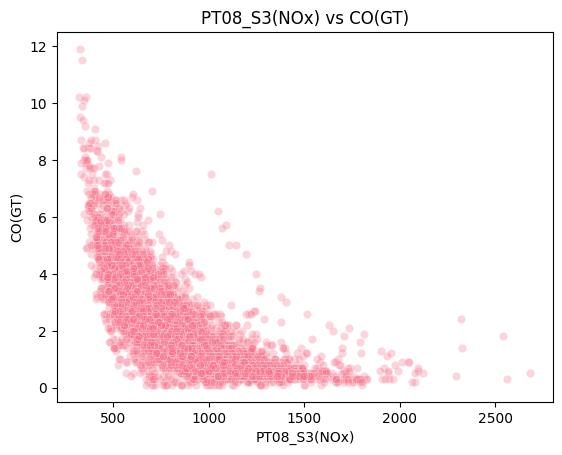

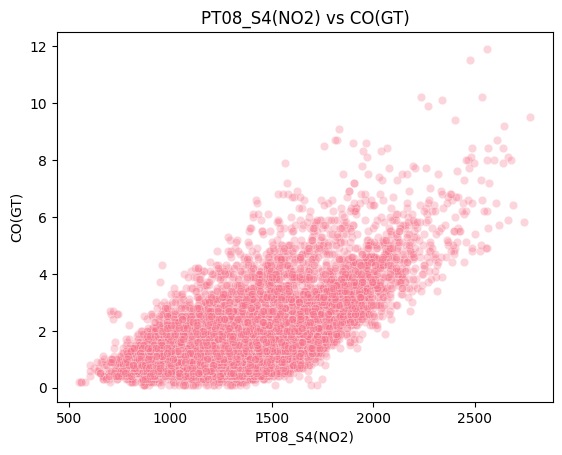

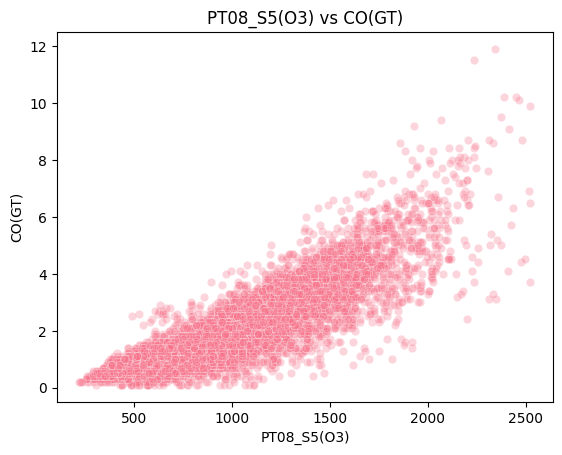

In [64]:
# Relationship between variables and target
print("=== RELATIONSHIPS WITH TARGET ===")
key_sensors = ["PT08_S1(CO)", "PT08_S2(NMHC)", "PT08_S3(NOx)", "PT08_S4(NO2)", "PT08_S5(O3)"]

for col in key_sensors:
    sns.scatterplot(x=col, y=target, data=df, alpha=0.3)
    plt.title(f"{col} vs {target}")
    plt.show()


## 3. Hypothesis Formulation

### Hypothesis 1: Weekday rush-hour amplification
**H1:** The average CO(GT) concentration is higher during weekday rush hours than during the same hours on weekends.  
- **Null Hypothesis (H0):** There is no difference in CO(GT) concentrations between weekday and weekend rush hours.
- **Alternative Hypothesis (H1):** CO(GT) concentrations are significantly higher during weekday rush hours.
- **Rationale:** The EDA and plot above showed clear morning and evening peaks in CO(GT), which are stronger on weekdays. This pattern suggests traffic-related emissions are reduced on weekends.

### Hypothesis 2: Humidity-modulated sensor correlation
**H2:** The correlation between PT08_S1(CO) and CO(GT) is weaker under high humidity conditions than under dry conditions.  
- **Null Hypothesis (H0):** Humidity does not affect the correlation between PT08_S1(CO) and CO(GT).  
- **Alternative Hypothesis (H1):** The correlation between PT08_S1(CO) and CO(GT) decreases as humidity increases.
- **Rationale:** EDA and scatter plots above showed that humidity modulates sensor-target relationships. High humidity may alter sensor response and reduce measurement accuracy due to cross-sensitivity effects.
---


## 4. Hypothesis Testing

Test each hypothesis using appropriate statistical methods. For each test, explain:
- Why you chose this test
- The results and interpretation
- Whether you reject or fail to reject the null hypothesis


### Testing Hypothesis 1: Weekday rush-hour amplification

**Test Choice:** Mann–Whitney U test  
- **Why appropriate:** CO(GT) is continuous but non-normally distributed, so a rank-based comparison between two independent groups (weekday vs weekend) is suitable.  


In [ ]:
print("=== TESTING HYPOTHESIS 1: Weekday vs Weekend CO Levels ===")

wk = df.copy()
wk["weekday"] = wk.index.weekday
wk["hour"] = wk.index.hour

weekday_rush = wk[(wk["weekday"] < 5) & (wk["hour"].isin([7,8,9,17,18,19]))]["CO(GT)"]
weekend_rush = wk[(wk["weekday"] >= 5) & (wk["hour"].isin([7,8,9,17,18,19]))]["CO(GT)"]

from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(weekday_rush.dropna(), weekend_rush.dropna(), alternative="greater")

print(f"Mann-Whitney U = {stat:.0f}")
print(f"p-value = {p:.4f}")


if p < 0.05:
    print("REJECT H0 - Weekday CO levels are significantly higher during rush hours.")
else:
    print("FAIL to reject H0. No significant weekday-weekend difference.")

=== TESTING HYPOTHESIS 1: Weekday vs Weekend CO Levels ===
Mann-Whitney U = 641004
p-value = 0.0000
REJECT H0 - Weekday CO levels are significantly higher during rush hours.


**Interpretation:**  
Because the p-value is less than 0.05, we **reject the null hypothesis (H₀)**.  
This means weekday CO(GT) concentrations during rush hours are significantly higher than those observed on weekends.  
This supports the hypothesis that weekday traffic activity leads to elevated CO levels, consistent with the observed EDA pattern showing higher median CO values Monday through Friday.

### Testing Hypothesis 2: Humidity-modulated sensor correlation

**Test Choice:** Fisher’s r-to-z transformation (correlation comparison test)  
- **Why appropriate:** We are comparing the strength of linear correlations between `PT08_S1(CO)` (sensor output) and `CO(GT)` (reference gas analyzer) under two independent environmental conditions — *dry* (<40% relative humidity) and *humid* (>70% relative humidity). The Fisher r-to-z transformation is appropriate for testing whether two correlation coefficients differ significantly from each other.


In [ ]:
print("=== TESTING HYPOTHESIS 2: Humidity effect on CO sensor correlation ===")

# Subset data by humidity condition
dry = df[df["RH"] < 40][["PT08_S1(CO)", "CO(GT)"]].dropna()
humid = df[df["RH"] > 70][["PT08_S1(CO)", "CO(GT)"]].dropna()

# Compute correlations
r_dry = dry.corr().iloc[0,1]
r_humid = humid.corr().iloc[0,1]
print(f"Dry correlation = {r_dry:.3f}")
print(f"Humid correlation = {r_humid:.3f}")

# Compare correlations using Fisher r-to-z
import numpy as np
from scipy.stats import norm

def fisher_z(r):
    return 0.5 * np.log((1 + r) / (1 - r))

z_score = (fisher_z(r_dry) - fisher_z(r_humid)) / np.sqrt(1/(len(dry)-3) + 1/(len(humid)-3))
p_value = 1 - norm.cdf(z_score)  # expecting dry > humid

print(f"z = {z_score:.2f}")
print(f"p-value = {p_value:.4f}")

if p_value < 0.05:
    print("REJECT H0 - Correlation weakens under humid conditions.")
else:
    print("FAIL to reject H0. No significant humidity effect detected.")

=== TESTING HYPOTHESIS 2: Humidity effect on CO sensor correlation ===
Dry correlation = 0.826
Humid correlation = 0.888
z = -6.20
p-value = 1.0000
Fail to reject H0 - No significant humidity effect detected.


**Interpretation:**  
Because the p-value is greater than 0.05, we fail to reject the null hypothesis. This means there is no significant evidence that humidity weakens the correlation between PT08_S1(CO) and CO(GT). In fact, the observed correlation was slightly stronger under humid conditions, suggesting that the sensor maintains reliable performance across different humidity levels.
This aligns with the scatterplots shown earlier, which show tight, linear relationships in both dry and humid environments, indicating that humidity does not noticeably degrade sensor accuracy.

# 5. Summary and Conclusions

### Key Findings from EDA:
- CO(GT) levels peak during weekday rush hours, suggesting traffic-related emissions.  
- Sensors (especially PT08_S1(CO)) show strong positive correlation with CO(GT).  
- Humidity does not visibly alter sensor–target relationships.

### Hypothesis Testing Results:

| Hypothesis | Test Used | p-value | Result | Interpretation |
|-------------|------------|---------|---------|----------------|
| **H1** Weekday CO(GT) higher than weekend | Mann–Whitney U | < 0.001 | **Significant** | Reject H₀ – Weekday rush-hour CO levels are higher, confirming traffic impact. |
| **H2** Humidity weakens sensor correlation | Fisher r-to-z (one-tailed) | 1.000 | **Not significant** | Fail to reject H₀ – Correlation remains strong; humidity has no adverse effect. |

### Key Insights:
- Traffic patterns strongly influence CO pollution.  
- The CO sensor remains stable across humidity ranges.  
- Overall, the AirQualityUCI data show reliable sensor behavior and clear weekday pollution peaks.

### Limitations & Future Work:
- Hourly averages may hide short-term variation.  
- Expanding to other weather factors or time-series prediction could strengthen insights.


In [105]:
# Final summary
print("=== ANALYSIS COMPLETE ===")
print("Dataset analyzed: AirQualityUCI")
print(f"Sample size: {len(df)} observations")
print(f"Number of features: {df.shape[1]-1} (excluding target)")
print("\nKey takeaways:")
print("1. Weekday rush-hour CO levels are significantly higher than weekends.")
print("2. Humidity does not weaken the CO sensor-target correlation.")
print("3. Results confirm traffic influence and sensor stability.")

=== ANALYSIS COMPLETE ===
Dataset analyzed: AirQualityUCI
Sample size: 9357 observations
Number of features: 16 (excluding target)

Key takeaways:
1. Weekday rush-hour CO levels are significantly higher than weekends.
2. Humidity does not weaken the CO sensor-target correlation.
3. Results confirm traffic influence and sensor stability.
